In [3]:
import torch
import os
import pandas as pd
import langdetect
from langdetect import DetectorFactory, detect, detect_langs
from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import HuggingFacePipeline
from langchain.llms import Ollama
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
import myloadlib
import myutils

In [4]:
import importlib 
importlib.reload(myloadlib)
data = []

In [5]:
notebook = myloadlib.readNotebook('../Main.ipynb')
type(notebook)

langchain_core.documents.base.Document

In [6]:
notebook

Document(page_content='\n\n## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions: \n\n- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?\n- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- Which were the challenges in the project devel

In [7]:
data.append(notebook)

In [8]:
data[0]

Document(page_content='\n\n## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions: \n\n- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?\n- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- Which were the challenges in the project devel

In [9]:
paper = myloadlib.loadFile('../data/research_paper.pdf')
data.extend(paper)

In [10]:
data

[Document(page_content='\n\n## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions: \n\n- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?\n- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- Which were the challenges in the project deve

In [11]:

subject = 'personal Greenhouse gas emissions'
wiki_docs = myloadlib.loadWiki(subject, 'en', 10)
wiki_docs[:2]

[Document(page_content="Greenhouse gas (GHG) emissions from human activities intensify the greenhouse effect. This contributes to climate change. Carbon dioxide (CO2), from burning fossil fuels such as coal, oil, and natural gas, is one of the most important factors in causing climate change. The largest emitters are China followed by the United States. The United States has higher emissions per capita. The main producers fueling the emissions globally are large oil and gas companies. Emissions from human activities have increased atmospheric carbon dioxide by about 50% over pre-industrial levels. The growing levels of emissions have varied, but have been consistent among all greenhouse gases. Emissions in the 2010s averaged 56 billion tons a year, higher than any decade before. Total cumulative emissions from 1870 to 2017 were 425±20 GtC (1558 GtCO2) from fossil fuels and industry, and 180±60 GtC (660 GtCO2) from land use change. Land-use change, such as deforestation, caused about 31

In [12]:
data.extend(wiki_docs)
data

[Document(page_content='\n\n## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions: \n\n- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?\n- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- Which were the challenges in the project deve

In [13]:
len(data)

24

In [14]:
url = 'https://www.youtube.com/watch?v=a9yO-K8mwL0&t=10s'
yt_transcript = myloadlib.loadYoutube(url, 'en')
yt_transcript

[Document(page_content="you know you should probably reduce it  but what exactly is  your carbon footprint  [Music]  a carbon footprint refers to the total  amount of greenhouse gases released into  the earth's atmosphere  as a result of the activities of an  individual or an organization  remember greenhouse gases trap heat  inside the atmosphere  and that's overheating the planet so if  you want to work out your own carbon  footprint  you need to know the amount of  greenhouse gases like carbon dioxide  you're responsible for creating it's a  difficult thing to measure precisely and  there are different definitions  about how best to calculate it but  roughly speaking  there's the direct impact of using  energy when we travel  or to power our homes and there's the  indirect impact of the energy that's  used to create all the things we use or  consume  in the developed world in particular  transport is a big part of your carbon  footprint  cutting down on the use of petrol or  diesel 

In [15]:
data.extend(yt_transcript)
data

[Document(page_content='\n\n## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions: \n\n- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?\n- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- Which were the challenges in the project deve

In [16]:
splits = myutils.chunkDocs(data, 400)  
splits

[Document(page_content='## Introduction\n\nIn this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.\nWe will try to answer the following questions:'),
 Document(page_content='- Which are the most decisive factors for carbon emissions for an individual?\n- Does internet usage directly affect total carbon emissions?\n- Does the important factors differ between males and females?\n- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?\n- Are the people travelling frequently by plane, the ones who are emitting the most carbon?'),
 Document(page_content='- Which machine learning methods did you choose to apply in the application?\n- How accurate is your solution of prediction?\n- 

In [17]:
len(splits)

383

In [18]:
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df.sample()

,page_content,metadata,type
127,"(page_content, 2093 Sustainability Science (20...","(metadata, {'source': '../data/research_paper....","(type, Document)"


In [19]:
im, longstring = myutils.wordCloud(df, 'page_content')

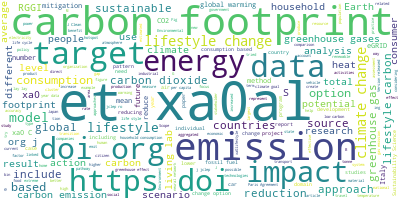

In [20]:
im

In [21]:
model_name = "sentence-transformers/all-mpnet-base-v2"
# model_name = "sentence-transformers/all-MiniLM-l6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

In [22]:
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [23]:
db = Chroma.from_documents(splits, embeddings)

In [24]:
persist_directory = '../data/chroma/'

# Create the vector store
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    persist_directory=persist_directory
)
vectordb.persist()

In [25]:
vectordb._collection.count()

767

In [26]:
query = 'greenhouse gas emissions'
docs = vectordb.similarity_search(query, k=3)
docs

[Document(page_content='== Greenhouse gas emissions ==', metadata={'source': 'https://en.wikipedia.org/wiki/Climate_change_in_Italy', 'summary': 'In Italy, widespread impacts of climate change are currently being felt. With an increase in extreme events such as heatwaves, droughts and more frequent flooding, Italy faces many challenges adapting to climate change.One such case of the impact of sea level rise is the need for the preservation of the coastal city of Venice, which is facing increasing issues due to the rising sea levels. The economic, social, and environmental impacts that climate change creates, and an increasingly problematic death toll from the health risks that come with climate change, is a great challenge for Italy.Italy was the first country to make education on climate change compulsory, and has included "protection of the environment, biodiversity and ecosystems" in the constitution in order to "protect future generations". Italy is part of the Paris Agreement, the

In [27]:
!ollama list

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


NAME        	ID          	SIZE  	MODIFIED     
gemma:latest	430ed3535049	5.2 GB	40 hours ago	


In [28]:
llm = Ollama(model="gemma", callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]))

In [37]:
template = """Use the following pieces of context to answer the question at the end. 
If you don't know the answer, just say that you don't know, don't try to make up an answer. 
Use five sentences maximum. Keep the answer as concise as possible. 
{context}
This knowledge is some information the user has inputted, and wants some information about. Use the context to give some insights about the knowledge
Always state the knowledge, and then the question, and then the answer.
knowledge: {knowledge}
Question: {question}
Helpful Answer:"""

In [41]:
prompt = PromptTemplate.from_template(template, partial_variables={"knowledge": "The user is a really cool person"})
chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt})

In [39]:
question = "What are the main sources of greenhouse gas emissions?"

In [40]:
result = chain({"query": question})
result["result"]

ValueError: Missing some input keys: {'knowledge'}